# Data 불러오기 및 형태 분석

## 1. Wikipedia Document

In [1]:
# 라이브러리 불러오기 
import os
import json

In [4]:
wiki_path = 'data/wikipedia_documents.json'
wiki_doc = json.load(open(wiki_path, 'r'))

print(f'wiki_doc 길이 : {len(wiki_doc)}')

wiki_doc 길이 : 60613


In [7]:
wiki_doc['0']

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

## 2. Train Dataset

In [8]:
from datasets import load_from_disk

train_path = 'data/train_dataset'

train = load_from_disk(train_path)
train

DatasetDict({
    train: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 240
    })
})

In [9]:
train['train'][0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [26]:
# context 길이 분포
train_context_len_list = [len(context) for context in train['train']['context']]

# answers 길이 분포
train_answers_len_list = [len(answer['text'][0]) for answer in train['train']['answers']]


# context 결측값 조사
print(f'context 결측값 개수 : {train_context_len_list.count(0)}')

# answers 결측값 조사
print(f'answers 결측값 개수 : {train_answers_len_list.count(0)}')


context 결측값 개수 : 0
answers 결측값 개수 : 0


Text(0, 0.5, 'Frequency')

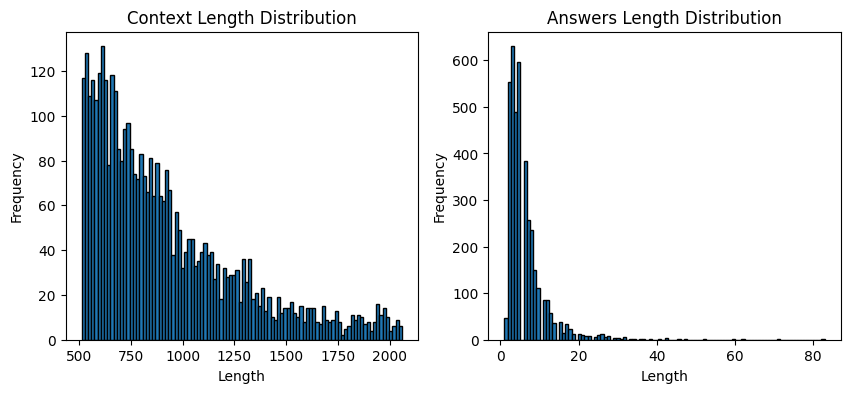

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(train_context_len_list, bins=100, edgecolor='black')
axes[0].set_title('Context Length Distribution')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(train_answers_len_list, bins=100, edgecolor='black')
axes[1].set_title('Answers Length Distribution')
axes[1].set_xlabel('Length')
axes[1].set_ylabel('Frequency')

In [34]:
import statistics

print('============= Context Data =============\n')

print(f'Context 최대 길이 : {max(train_context_len_list)}')
print(f'Context 최소 길이 : {min(train_context_len_list)}')
print(f'Context 평균 길이 : {sum(train_context_len_list) / len(train_context_len_list)}')
print(f'Context 표준편차 : {statistics.stdev(train_context_len_list)}\n\n')

print('============= Answers Data =============\n')

print(f'Answers 최대 길이 : {max(train_answers_len_list)}')
print(f'Answers 최소 길이 : {min(train_answers_len_list)}')
print(f'Answers 평균 길이 : {sum(train_answers_len_list) / len(train_answers_len_list)}')
print(f'Answers 표준편차 : {statistics.stdev(train_answers_len_list)}')


============= Context Data =============

Context 최대 길이 : 2059
Context 최소 길이 : 512
Context 평균 길이 : 920.2206477732793
Context 표준편차 : 356.50051395517175


============= Answers Data =============

Answers 최대 길이 : 83
Answers 최소 길이 : 1
Answers 평균 길이 : 6.275050607287449
Answers 표준편차 : 5.346841757336768


In [53]:
answer_padding = 15

print('최장 답변\n')

longest_answer = train["train"][train_answers_len_list.index(max(train_answers_len_list))]
longest_answer_start = longest_answer['answers']['answer_start'][0]

print(f'길이 : {max(train_answers_len_list)}')
print(f'문제 : {longest_answer["question"]}')
print(f'답변 : {longest_answer["answers"]["text"][0]}')
print(f'문단(-pad ~ +pad) :\n{longest_answer["context"][longest_answer_start-answer_padding:longest_answer_start + len(longest_answer["answers"]["text"][0])+answer_padding]}')

print('\n==========================================\n')
print('최단 답변\n')

shortest_answer = train["train"][train_answers_len_list.index(min(train_answers_len_list))]
shortest_answer_start = shortest_answer['answers']['answer_start'][0]

print(f'길이 : {min(train_answers_len_list)}')
print(f'문제 : {shortest_answer["question"]}')
print(f'답변 : {shortest_answer["answers"]["text"][0]}')
print(f'문단(-pad ~ +pad) :\n{shortest_answer["context"][shortest_answer_start-answer_padding:shortest_answer_start + len(shortest_answer["answers"]["text"][0])+answer_padding]}')



최장 답변

길이 : 83
문제 : 윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?
답변 : “나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”
문단(-pad ~ +pad) :
주장한다. 자신의 일기에도 “나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”(윤치호 일기, 1919년 


최단 답변

길이 : 1
문제 : 초고층 주거에서 차량과 사람의 활동 범위 중복을 최소화하는 장치는?
답변 : 덱
문단(-pad ~ +pad) :
 면적을 늘리는 대안 - ’덱’라는 장치였다. 인공 상판


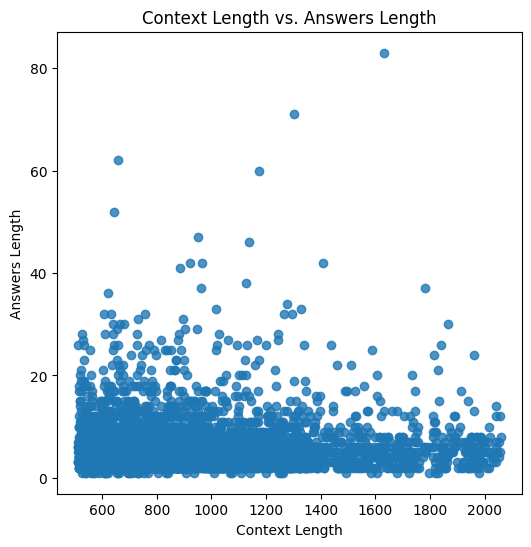

In [31]:
# 본문 길이와 답변 길이 간의 상관관계 분석

plt.figure(figsize=(6, 6))
plt.scatter(train_context_len_list, train_answers_len_list, alpha=0.8)
plt.title('Context Length vs. Answers Length')
plt.xlabel('Context Length')
plt.ylabel('Answers Length')
plt.show()

- 본문 길이 분포와 답변 길이 분포 간 추세가 존재하지 않음을 알 수 있음